<a href="https://colab.research.google.com/github/SettibathulaJyothi/Machine-Learning-and-Deep-Learning-Projects/blob/main/A_Neural_Network_for_predicting_house_prices_using_Boston_Housing_Price_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Step 1: Install & Import Libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Step 2: Load the Dataset
from sklearn.datasets import fetch_california_housing
# Load dataset
data = fetch_california_housing()
# Convert to Pandas DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['PRICE'] = data.target  # Add target variable
# Display first few rows
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [5]:
#Step 3: Data Preprocessing
# Split features and target variable
X = df.drop('PRICE', axis=1)
y = df['PRICE']
# Split into training & testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Standardize data for better neural network performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
#Step 4: Define the Neural Network Model
# Create a Sequential model
model = Sequential([
Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
Dropout(0.2),
Dense(64, activation='relu'),
Dropout(0.2),
Dense(32, activation='relu'),
Dense(1)  # Output layer (single neuron for regression)
])
# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
#Step 5: Train the Model
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=16, validation_split=0.2)

Epoch 1/10
826/826 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.3379 - mae: 0.4032 - val_loss: 0.3280 - val_mae: 0.3872
Epoch 2/10
826/826 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.3366 - mae: 0.4034 - val_loss: 0.3170 - val_mae: 0.3906
Epoch 3/10
826/826 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.3212 - mae: 0.3934 - val_loss: 0.3140 - val_mae: 0.3810
Epoch 4/10
826/826 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.3138 - mae: 0.3913 - val_loss: 0.3347 - val_mae: 0.4202
Epoch 5/10
826/826 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3074 - mae: 0.3877 - val_loss: 0.3180 - val_mae: 0.3935
Epoch 6/10
826/826 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3082 - mae: 0.3881 - val_loss: 0.3155 - val_mae: 0.3904
Epoch 7/10
826/826 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.2928 - mae: 0.3783 - val_loss: 0.3225 - val_mae: 0.3891
Epoch 8/10
826/826 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.2989 - mae: 0.3791 - val_loss: 0.3036 - val_mae: 0.3712
Epoch 9/10
826/826 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - lo

In [10]:
#Step 6: Evaluate the Model
# Evaluate on test data
loss, mae = model.evaluate(X_test, y_test)
print(f"Test Loss (MSE): {loss}")
print(f"Test MAE: {mae}")

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2835 - mae: 0.3629
Test Loss (MSE): 0.2897767722606659
Test MAE: 0.36549434065818787


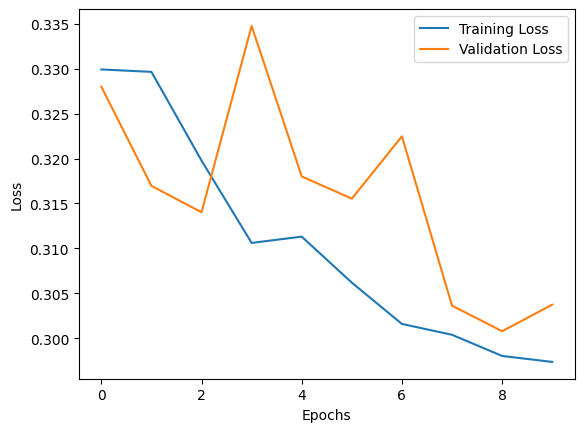

In [11]:
#Step 7: Visualize Training Performance
# Plot training loss and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


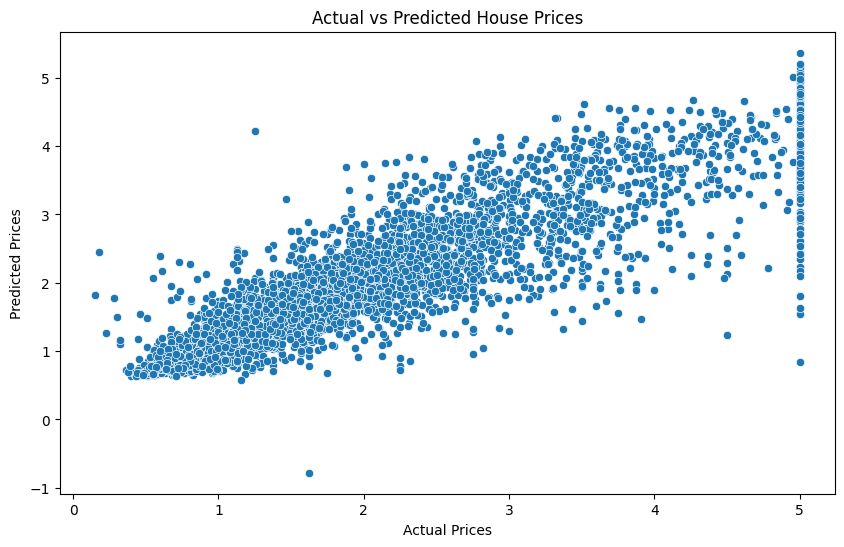

In [12]:
#Step 8: Make Predictions
# Predict house prices
y_pred = model.predict(X_test)
# Compare actual vs predicted values
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred.flatten())
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()